In [22]:
import numpy as np
import pandas as pd

# 데이터 준비
data = pd.read_csv("./data/전처리된_전체_데이터.csv")

data

,Year,Month,Region_Name,Building_Age,Building_Use,JS_Price,JS_BA,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Sell_Price,Crime_Rates,위도,경도
0,2011,1,관악구,6,오피스텔,12000,25.05,521193,2.75,3.8,72.0,78.2,74.2,NaN,81.2,15800.00,NaN,37.474500,126.981390
1,2011,2,관악구,6,오피스텔,10000,25.05,521193,2.75,4.5,72.3,78.2,74.5,NaN,82.0,16875.00,NaN,37.474500,126.981390
2,2011,2,관악구,6,오피스텔,10500,26.18,521193,2.75,4.5,72.3,78.2,74.5,NaN,82.0,16875.00,NaN,37.474500,126.981390
3,2011,5,관악구,6,오피스텔,12000,27.15,521193,3.00,3.2,72.6,78.9,75.8,NaN,80.6,17216.67,NaN,37.474500,126.981390
4,2011,10,관악구,6,오피스텔,11500,27.15,521193,3.25,2.9,72.9,80.0,77.1,NaN,79.4,22000.00,NaN,37.474500,126.981390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189429,2022,11,송파구,14,아파트,96900,84.80,652993,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,193312.50,NaN,37.514069,127.081381
1189430,2022,11,서초구,17,아파트,25500,29.60,402936,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,33000.00,NaN,37.486044,126.984201
1189431,2022,11,강서구,6,오피스텔,15180,25.55,567898,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,18125.00,NaN,37.560579,126.837594
1189432,2022,11,송파구,9,오피스텔,19800,26.82,652993,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,21100.00,NaN,37.480095,127.119684


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189434 entries, 0 to 1189433
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Year          1189434 non-null  int64  
 1   Month         1189434 non-null  int64  
 2   Region_Name   1189434 non-null  object 
 3   Building_Age  1189434 non-null  int64  
 4   Building_Use  1189434 non-null  object 
 5   JS_Price      1189434 non-null  int64  
 6   JS_BA         1189434 non-null  float64
 7   Population    1189434 non-null  int64  
 8   IR            1182725 non-null  float64
 9   UR            1182725 non-null  float64
 10  LC_index      1182725 non-null  float64
 11  CA_index      1182725 non-null  float64
 12  TC_index      1182725 non-null  float64
 13  SDT_index     1040988 non-null  float64
 14  HSP_index     1166201 non-null  float64
 15  Sell_Price    1189434 non-null  float64
 16  Crime_Rates   793796 non-null   float64
 17  위도            1189434 non-n

## 시각화(QQ 플롯)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

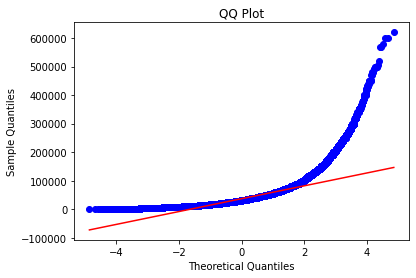

In [17]:
# 열의 데이터를 가져옵니다.
sample_data = data['JS_Price']

# QQ 플롯 그리기
stats.probplot(sample_data, dist='norm', plot=plt)
plt.title('QQ Plot')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

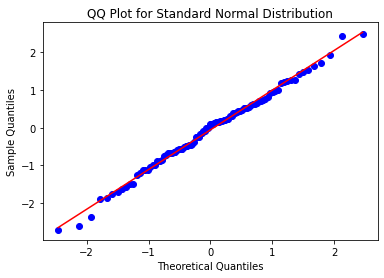

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 평균이 0이고 표준 편차가 1인 표준 정규 분포로부터 샘플 데이터 생성
data = np.random.normal(0, 1, 100)

# QQ 플롯 그리기
stats.probplot(data, dist="norm", plot=plt)
plt.title("QQ Plot for Standard Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()


# 로버스트 통계 방법 코드

In [19]:
import pandas as pd
from scipy import stats

## IQR을 사용
- 데이터의 분포가 정규분포에 가까울 때
- 대부분의 이상치가 상위 이상치인 경우 또는 하위 이상치인 경우
- 일반적인 통계적 분석에서 표준적인 방법으로 사용할 때

In [23]:
import numpy as np
import pandas as pd

# 선택한 열의 데이터를 가져옵니다.
sample_data = data['JS_Price']

# 중앙값과 IQR 계산
median = sample_data.median()
iqr = stats.iqr(sample_data)

# 이상치 경계값 설정 (예: 1.5배 IQR)
outlier_upper_bound = median + 1.5 * iqr
outlier_lower_bound = median - 1.5 * iqr

# 이상치 식별
outliers = sample_data[(sample_data > outlier_upper_bound) | (sample_data < outlier_lower_bound)]

# 이상치 출력
print("이상치:")
print(outliers)

# 이상치 개수 확인
outlier_count = len(outliers)

# 이상치 개수 출력
print("이상치 개수:", outlier_count)

이상치:
0           12000
1           10000
2           10500
3           12000
4           11500
            ...  
1189427    103950
1189428     44100
1189429     96900
1189431     15180
1189433     88000
Name: JS_Price, Length: 571884, dtype: int64
이상치 개수: 571884


## MAD
- 데이터의 분포가 정규분포를 따르지 않을 때
- 이상치가 극단적으로 크거나 데이터셋이 작을 때

In [ ]:
import numpy as np
import pandas as pd

def detect_outliers(df, column, threshold=3.5):
    # 중앙값, 중앙값 절대 편차 계산
    median = np.median(df[column])
    mad = np.median(np.abs(df[column] - median))

    # 아웃라이어 탐지
    outlier_threshold = threshold * mad
    outliers = df[column][(df[column] < median - outlier_threshold) | (df[column] > median + outlier_threshold)]

    return outliers

def count_outliers_robust(df, column, threshold=1.5):

    """
    로버스트 통계를 사용하여 아웃라이어의 수를 계산합니다.

    Args:
        df: 데이터프레임
        column: 아웃라이어를 탐지할 열의 이름
        threshold: 아웃라이어의 기준값 (기본값: 1.5)

    Returns:
        아웃라이어의 수
    """

    # 아웃라이어 탐지
    outliers = detect_outliers(df, column, threshold)

    # 아웃라이어의 수 계산
    outlier_count = len(outliers)

    return outlier_count

data = pd.read_csv('/content/drive/MyDrive/semi_project/전처리된_전체_데이터.csv')

# 아웃라이어 탐지
outliers = detect_outliers(data, 'JS_Price')

# 아웃라이어의 수 계산
outlier_count = count_outliers_robust(data, 'JS_Price')

print(outlier_count)

233891


## IQR
- 4.3% 제거

In [54]:
import numpy as np
import pandas as pd

def detect_outliers_iqr(df,column, threshold=1.5):
  '''
  IQR을 사용하여 아웃라이어를 탐지

  Args:
      df : 데이터프레임
      column : 아웃라이어의 탐지할 열의 이름
      threshold : 아웃라이어의 기준값 (기본값 : 1.5)

  Returns:
      아웃라이어를 포함하는 Series 객체
  '''

  # 1사분위수, 3사분위수, IQR 계산
  Q1 = np.percentile(df[column], 25)
  Q3 = np.percentile(df[column], 75)
  IQR = Q3 - Q1

  # 아웃라이어 탐지
  outlier_threshold = threshold * IQR
  outliers = df[column][(df[column] < Q1 - outlier_threshold) | (df[column] > Q3 + outlier_threshold)]

  return outliers

def count_outliers_iqr(df, column, threshold=1.5):

    """
    IQR을 사용하여 아웃라이어의 수를 계산합니다.

    Args:
        df: 데이터프레임
        column: 아웃라이어를 탐지할 열의 이름
        threshold: 아웃라이어의 기준값 (기본값: 1.5)

    Returns:
        아웃라이어의 수
    """

    # 아웃라이어 탐지
    outliers = detect_outliers_iqr(df, column, threshold)

    # 아웃라이어의 수 계산
    outlier_count = len(outliers)

    return outlier_count

# 예제
data = pd.read_csv('/content/drive/MyDrive/semi_project/전처리된_전체_데이터.csv')

outlier_count = count_outliers_iqr(data, "JS_Price")

print(outlier_count)

36062


### 다른 이름으로 CSV파일 저장

In [51]:
# 아웃라이어를 제거한 데이터프레임 생성
df_without_outliers = data.copy()
df_without_outliers.drop(outliers.index, inplace=True)

# 아웃라이어를 제거한 데이터프레임을 다른 이름으로 저장
data = pd.read_csv('/content/drive/MyDrive/semi_project/전처리된_전체_데이터.csv')

KeyError: ignored